In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import matplotlib
import pandas_profiling


In [2]:
import os
print(os.getcwd())

C:\Users\kbj80\AppData\Local\Temp\7b5a4f62-ab02-4b8e-938b-b1917b7a0065


In [3]:
df = pd.read_excel("D:\Project\Data_set\data2019.xlsx")
df.head(5)

,회원번호,성명,주민번호,주소,상태,가입상품,가입일자,최종불입일자,총납입회차,최종불입회차,...,실입금액,기간입금액,기간할인액,잔여금액,조합예수잔액,납입방법,담당자,부서,연체횟수,성별
0,1011A00017,박강석,480209-1000000,경기 고양시 덕양구 관산동 537-7 자성빌라 다동302,행사,부금1980000,2005-10-27,2010-02-23,100,100,...,1980000,1980000,0,0,0,CMS,더피플라이프,관리부,0,남
1,1011A00027,정회범,610912-1000000,경기 광주시 목현동 21번지 신일아파트 103-803호,해약,부금1980000,2005-10-27,NaN,100,0,...,0,0,0,1980000,1980000,CMS,더피플라이프,관리부,100,남
2,1011A00087,정병구,510129-1000000,경기 고양시 덕양구 행신2동 소만마을 616-804,행사,부금1980000,2005-11-08,2013-02-01,100,100,...,1980000,1980000,0,0,0,CMS,더피플라이프,관리부,0,남
3,1011A00097,이충일,550906-1000000,서울 마포구 망원1동 414-56,해약,부금1980000,2005-11-12,2005-11-25,100,1,...,19800,19800,0,1960200,1960200,CMS,더피플라이프,관리부,99,남
4,1011A00143,곽경근,611117-1000000,서울 마포구 망원1동 418-23 3층,해약,부금1980000,2005-11-22,2009-09-21,100,44,...,386100,871200,0,623700,1108800,CMS,더피플라이프,관리부,56,남


In [8]:
df.describe()

,총납입회차,최종불입회차,상품금액,총불입액,해약금액,실입금액,기간입금액,기간할인액,잔여금액,조합예수잔액,연체횟수
count,234613.000000,234613.000000,2.346130e+05,2.346130e+05,2.346130e+05,2.346130e+05,2.346130e+05,234613.000000,2.346130e+05,2.346130e+05,234613.000000
mean,230.806703,28.506830,3.388980e+06,5.442972e+05,9.034893e+04,4.486349e+05,5.392712e+05,287.369860,2.754334e+06,2.848436e+06,21.967431
std,118.146057,39.084179,7.345649e+05,7.924354e+05,3.398033e+05,7.170273e+05,7.876470e+05,4633.895957,1.507643e+06,1.329996e+06,40.033949
min,1.000000,0.000000,6.900000e+05,0.000000e+00,0.000000e+00,-1.650000e+05,0.000000e+00,-33000.000000,-3.876000e+06,-9.800000e+05,-447.000000
25%,100.000000,2.000000,2.800000e+06,3.000000e+04,0.000000e+00,3.000000e+04,3.000000e+04,0.000000,2.196000e+06,2.240000e+06,0.000000
50%,250.000000,10.000000,3.600000e+06,1.800000e+05,0.000000e+00,1.800000e+05,1.800000e+05,0.000000,3.461000e+06,3.470000e+06,0.000000
75%,360.000000,49.000000,3.900000e+06,5.760000e+05,0.000000e+00,4.680000e+05,5.700000e+05,0.000000,3.825000e+06,3.825000e+06,45.000000
max,390.000000,488.000000,8.900000e+06,4.880000e+06,3.876000e+06,4.880000e+06,4.880000e+06,600000.000000,8.900000e+06,8.900000e+06,120.000000


In [4]:
df.columns

Index(['회원번호', '성명', '주민번호', '주소', '상태', '가입상품', '가입일자', '최종불입일자', '총납입회차',
       '최종불입회차', '이체일', '은행', '계좌번호', '예금주', '상품금액', '총불입액', '해약금액', '실입금액',
       '기간입금액', '기간할인액', '잔여금액', '조합예수잔액', '납입방법', '담당자', '부서', '연체횟수', '성별'],
      dtype='object')

In [5]:
# 주소, 가입상품, 이체일, 은행, 계좌번호, 예금주, 총불입액, 해약금액, 실입금액, 기간입금액, 기간할인액, 조합예수잔액, 납입방법, 담당자, 부서 제외
df = df[['회원번호','성명','주민번호','상태','가입일자','최종불입일자','총납입회차','최종불입회차','상품금액','잔여금액','연체횟수','성별']]
df_backup = df[['회원번호','성명','주민번호','상태','가입일자','최종불입일자','총납입회차','최종불입회차','상품금액','잔여금액','연체횟수','성별']]


In [4]:
# 전처리 함수

# '나이' 계산
def export_age(idnum):
    age = 120 - (int(idnum[0:2]))
    return age

# '상태' 정리
def transform_status(current_status, flag):
    if current_status == '가입':
        if flag == 0:
            return '만기'
        else:
            return current_status

    elif current_status == '해약':
        if flag == 0:
            return '만기_해약'
        else:
            return current_status

    elif current_status == '미계좌':
        return '해약'

    elif current_status == '보류':
        return '가입'

    elif current_status == '접수':
        return '가입'

    elif current_status == '보류2':
        return '가입'
    
    elif current_status == '멤버쉽':
        return '가입'
    
    elif current_status == '해지':
        return '해약'
    
    else:
        return current_status

# 이건 금액 정리인데 나중에 정규화 하기 때문에 사용안함
# def export_price(price):
#     if price < 1000000: # 100만원 미만
#         return int(0)
#     elif price < 2000000: # 200만원 미만
#         return 1
#     elif price < 3000000:
#         return 2
#     elif price < 4000000:
#         return 3
#     elif price < 5000000:
#         return 4
#     elif price < 6000000:
#         return 5
#     elif price < 7000000:
#         return 6
#     elif price < 8000000:
#         return 7
#     else:
#         return 8
# print(export_price(1000000))    

# 사람 별 고유 id 뽑기
def transform_id(name, id_num):
    idnum = id_num[0:6]
    return name + idnum

# 연체횟수가 마이너스 인 값(행사값) 정리
def preprocess_event(num):
    if num < 0:
        return -1
    else:
        return num
    
# 진행률 = 최종불입회차 / 총 납입회차
def process_rate(total, last):
    rate = int(last) / int(total)
    return rate

# 성별 전처리
def preprocess_sex(sex):
    if sex =='남':
        return 0
    else:
        return 1

In [6]:
# NULL값 제거
df = df.dropna(how='any')
df.shape

(326040, 27)

In [7]:
df.head(5)

,회원번호,성명,주민번호,주소,상태,가입상품,가입일자,최종불입일자,총납입회차,최종불입회차,...,실입금액,기간입금액,기간할인액,잔여금액,조합예수잔액,납입방법,담당자,부서,연체횟수,성별
0,1011A00017,박강석,480209-1000000,경기 고양시 덕양구 관산동 537-7 자성빌라 다동302,행사,부금1980000,2005-10-27,2010-02-23,100,100,...,1980000,1980000,0,0,0,CMS,더피플라이프,관리부,0,남
2,1011A00087,정병구,510129-1000000,경기 고양시 덕양구 행신2동 소만마을 616-804,행사,부금1980000,2005-11-08,2013-02-01,100,100,...,1980000,1980000,0,0,0,CMS,더피플라이프,관리부,0,남
3,1011A00097,이충일,550906-1000000,서울 마포구 망원1동 414-56,해약,부금1980000,2005-11-12,2005-11-25,100,1,...,19800,19800,0,1960200,1960200,CMS,더피플라이프,관리부,99,남
4,1011A00143,곽경근,611117-1000000,서울 마포구 망원1동 418-23 3층,해약,부금1980000,2005-11-22,2009-09-21,100,44,...,386100,871200,0,623700,1108800,CMS,더피플라이프,관리부,56,남
7,1011A00219,박웅순,590410-1000000,충남 당진군 우강면 창리 201-5호,해약,부금1980000,2005-12-03,2006-03-20,100,4,...,79400,79400,0,1900600,1900600,CMS,더피플라이프,관리부,96,남


In [8]:
# 1차 전처리
# df['주소'] = df['주소'].apply(lambda x : export_adress(x))
df['나이'] = df['주민번호'].apply(lambda x : export_age(x))
df['상태'] = df.apply(lambda x: transform_status(x['상태'], x['총납입회차'] - x['최종불입회차']), axis=1)
# df['상품금액']= df['상품금액'].apply(lambda x : export_price(x))
df['이름번호'] = df.apply(lambda x: transform_id(x['성명'], x['주민번호']), axis=1)
df['연체횟수'] = df['연체횟수'].apply(lambda x : preprocess_event(x))
df['진행률'] = df.apply(lambda x: process_rate(x['총납입회차'] , x['최종불입회차']), axis=1)
df['성별'] = df['성별'].apply(lambda x : preprocess_sex(x))

In [9]:
# 날짜 데이터 타입 변환 object -> date

df['가입일자'] = pd.to_datetime(df['가입일자'])
df['최종불입일자'] = pd.to_datetime(df['최종불입일자'])

df['가입일자'] = pd.to_timedelta(df['가입일자'])
df['최종불입일자'] = pd.to_timedelta(df['최종불입일자'])

In [10]:

def d_date(signup_date, cancel_date):
    date = cancel_date.days - signup_date.days
    return date

df['가입기간'] = df.apply(lambda x: d_date(x['가입일자'] , x['최종불입일자']), axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326040 entries, 0 to 368974
Data columns (total 31 columns):
회원번호      326040 non-null object
성명        326040 non-null object
주민번호      326040 non-null object
주소        326040 non-null object
상태        326040 non-null object
가입상품      326040 non-null object
가입일자      326040 non-null timedelta64[ns]
최종불입일자    326040 non-null timedelta64[ns]
총납입회차     326040 non-null int64
최종불입회차    326040 non-null int64
이체일       326040 non-null object
은행        326040 non-null object
계좌번호      326040 non-null object
예금주       326040 non-null object
상품금액      326040 non-null int64
총불입액      326040 non-null int64
해약금액      326040 non-null int64
실입금액      326040 non-null int64
기간입금액     326040 non-null int64
기간할인액     326040 non-null int64
잔여금액      326040 non-null int64
조합예수잔액    326040 non-null int64
납입방법      326040 non-null object
담당자       326040 non-null object
부서        326040 non-null object
연체횟수      326040 non-null int64
성별        326040 non-nul

In [12]:
# 학습에 필요한 column만 추출
dfs=df[['이름번호','성별','나이','진행률','상품금액','잔여금액','연체횟수','가입기간','최종불입일자','상태']]

In [19]:
# 해약금액 0 인 row 제거
# def preprocess_cancle_price(price):
#     if price == 0:
#         return None
#     else:
#         return price
    
# dfs['해약금액'] = df['해약금액'].apply(lambda x : preprocess_cancle_price(x))
# df2 = dfs.dropna(how='any')
# df2.shape

In [14]:
dfs.shape

(344045, 10)

In [13]:
# df.to_csv("D:\Project\Django\Scripts\server_project\\test\owner_project\해약_2018.csv", index=False)
dfs.to_csv("preprocess_2019.csv", index=False)
df_report = dfs

In [23]:
pr = df_report.profile_report()
pr.to_file("preprocess_2019.html")

build report structure: 100%|██████████| 1/1 [00:06<00:00,  6.84s/it]


In [36]:
pr.to_file("preprocess_2019.html")

NameError: name 'pr' is not defined

In [14]:
# MIN MAX 정규화
def z_score_normalize(value, mean, std):
    normalized = []
    normalized_num = (value - mean) / std
    normalized.append(normalized_num)
    
    return normalized[0]

def min_max_normalize(value, min_list, max_list):
    normalized = []
    normalized_num = (value - min_list) / (max_list - min_list)
    normalized.append(normalized_num)
    
    return normalized[0]

In [15]:
# 나이, '상품금액','잔여금액','연체횟수','가입기간' 
mean_list = np.mean(list(dfs['나이']))
std_list = np.std(list(dfs['나이']))
dfs['나이'] = dfs['나이'].apply(lambda x : z_score_normalize(x, mean_list, std_list))

In [16]:
mean_list = np.mean(list(dfs['상품금액']))
std_list = np.std(list(dfs['상품금액']))
dfs['상품금액'] = dfs['상품금액'].apply(lambda x : z_score_normalize(x, mean_list, std_list))

In [17]:
mean_list = np.mean(list(dfs['잔여금액']))
std_list = np.std(list(dfs['잔여금액']))
dfs['잔여금액'] = dfs['잔여금액'].apply(lambda x : z_score_normalize(x, mean_list, std_list))

In [18]:
mean_list = np.mean(list(dfs['연체횟수']))
std_list = np.std(list(dfs['연체횟수']))
dfs['연체횟수'] = dfs['연체횟수'].apply(lambda x : z_score_normalize(x, mean_list, std_list))

In [19]:
mean_list = np.mean(list(dfs['가입기간']))
std_list = np.std(list(dfs['가입기간']))
dfs['가입기간'] = dfs['가입기간'].apply(lambda x : z_score_normalize(x, mean_list, std_list))

In [20]:
# Label 처리

def labeling(status):
    if status == '만기_해약': # = 0
        return 0
    elif status == '해약': # = 1
        return 1
    elif status == '행사': # = 2
        return 2
    elif status == '가입': # = 3
        return 3
    else: # 만기 = 4
        return 4

In [21]:
dfs['상태'] = dfs['상태'].apply(lambda x : labeling(x))

In [22]:
dfs.to_csv('normalization_zscore2019.csv',index=False)

In [27]:
pr = dfs.profile_report()
pr.to_file("normalized_zscore_report2019.html")

build report structure: 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]


In [24]:
pr.to_file("normalized_zscore_report2019.html")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001378C66D348>,
      dtype=object)

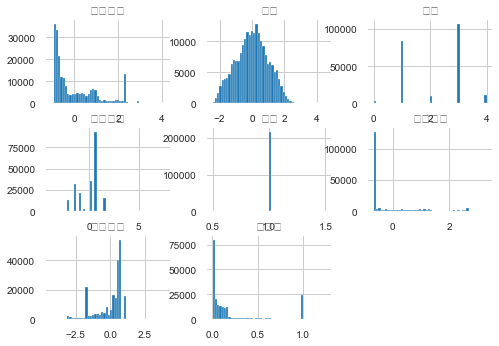

In [24]:
dfs.hist(bins=50)

In [25]:
dfs.head(2)

,이름번호,성별,나이,진행률,상품금액,잔여금액,연체횟수,가입기간,상태
0,이옥성590318,1,0.382534,1.0,-1.420096,-3.004457,-0.634846,2.284586,0
1,안성열581125,1,0.452842,1.0,-1.420096,-1.755918,-0.634846,1.047722,2
